coefficients- w1:  28.86467635885322  b:  51.20505109827672
-0.46181077366109946


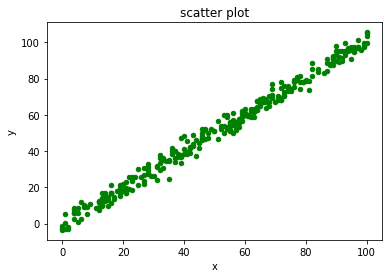

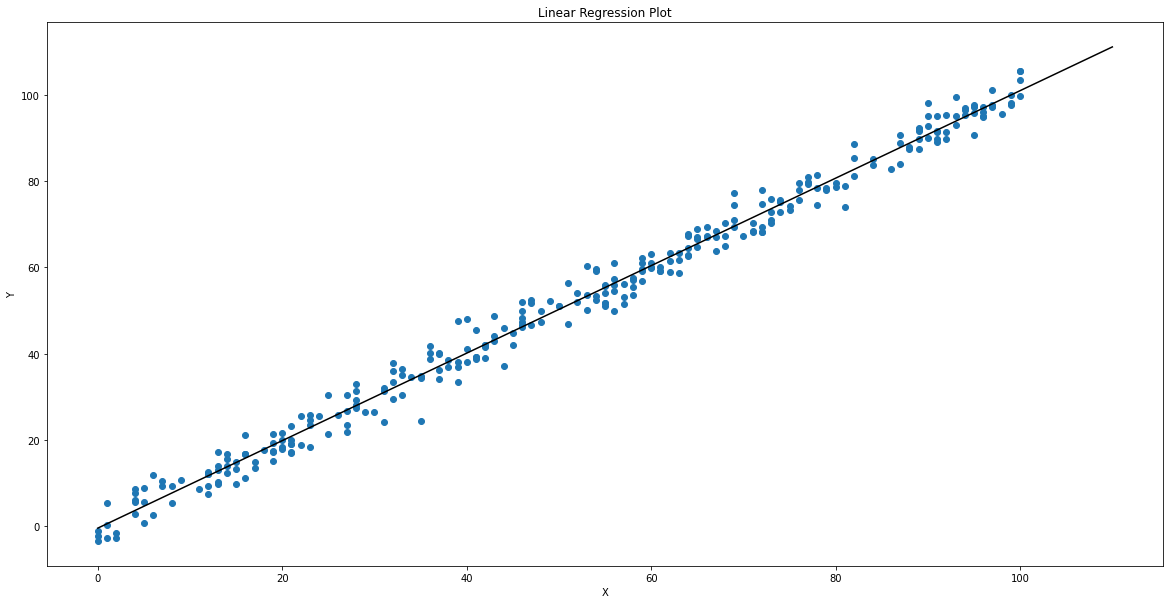

sk-learn in-built function results: 
w1:  28.86467635885324
b:  51.20505109827666


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#reading sample dataset
df = pd.read_csv("datasets_test.csv");
x = df["x"].to_list()
y = df["y"].to_list()

df.plot(kind='scatter',x='x',y='y',color='green',title= 'scatter plot')
size = len(x)

#sum of all input examples
sum = 0;
for i in x:
  sum = sum +i

#finding mean of the input set
mean = sum/size;

#finding standard deviation
sqr = 0
for i in x:
  sqr = sqr + pow((i-mean),2)

sd = pow(sqr/size,0.5)

#standardization of ipnut set
xs = []
for i in x:
  xs.append((i-mean)/sd)

A = np.array([[0,0],[0,0]]);
b = np.array([[0],[0]]);

for i in range(0,size):
  #generation of martix A = X * X^T for all i
  xaxis = np.array([[xs[i]],[1]])
  A = np.add(A,np.dot(xaxis,xaxis.T))

  #generation of matrix b = y * X for all i
  yaxis = y[i]
  b= np.add(b,yaxis*xaxis)

# w = inverse(A)* b
w = np.dot(np.linalg.inv(A),b)
print("coefficients- w1: ",float(w[0])," b: ",float(w[1]))

testx = np.linspace(0, 110, 500)
testy = [];

for i in testx:
  testy.append(((i-mean)/sd)*float(w[0])+float(w[1]))

print(testy[0])
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(testx, testy,color = 'black')

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.axis('tight')
plt.title("Linear Regression Plot")
plt.show()

#linear regression using Sklearn's fit() function
regX = np.array([xs]).T
regY = np.array(y)

reg = LinearRegression().fit(regX, regY)

print("sk-learn in-built function results: ")
print("w1: ",float(reg.coef_))
print("b: ",reg.intercept_)
